In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Define image size and batch size
IMG_SIZE = 224
BATCH_SIZE = 32

In [5]:
#creating training data parameters!
train_datagen =ImageDataGenerator(rescale=1./255,validation_split=0.2)
#creating training data with above parameters and applying transformations!
#folder = parameters.flow_from_directory(path,ts,bs,cm,subset)
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Flood_images/test',target_size=(IMG_SIZE, IMG_SIZE),
 batch_size=BATCH_SIZE,
 class_mode='categorical', subset='training'
)

Found 1632 images belonging to 3 classes.


In [6]:
val_generator = train_datagen.flow_from_directory(
'/content/drive/MyDrive/Flood_images/test',
 target_size=(IMG_SIZE, IMG_SIZE),
 batch_size=BATCH_SIZE,
 class_mode='categorical',subset='validation'
)

Found 408 images belonging to 3 classes.


In [7]:
class_indices=train_generator.class_indices
class_name=list(class_indices.keys())
print(class_indices)
print(class_name)

{'damage': 0, 'medium': 1, 'no_damage': 2}
['damage', 'medium', 'no_damage']


In [11]:
model = keras.Sequential([
 layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(IMG_SIZE, IMG_SIZE, 3)),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(64, (3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(128, (3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'])

In [13]:
model.fit(train_generator, epochs=5, validation_data=val_generator,
batch_size= BATCH_SIZE)

Epoch 1/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 398s 8s/step - accuracy: 0.5319 - loss: 0.9436 - val_accuracy: 0.6029 - val_loss: 0.6915
Epoch 2/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - accuracy: 0.7976 - loss: 0.4960 - val_accuracy: 0.5368 - val_loss: 0.9891
Epoch 3/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - accuracy: 0.8958 - loss: 0.3139 - val_accuracy: 0.6593 - val_loss: 0.8261
Epoch 4/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step - accuracy: 0.9147 - loss: 0.2068 - val_accuracy: 0.6446 - val_loss: 0.8915
Epoch 5/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - accuracy: 0.9428 - loss: 0.1662 - val_accuracy: 0.6863 - val_loss: 1.1242


In [14]:
model.save('/content/drive/MyDrive/Flood_model.h5')

In [16]:
#Load your model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt #visualisation
import numpy as np
model =load_model('/content/drive/MyDrive/Flood_model.h5')
print("Model Loaded")

Model Loaded


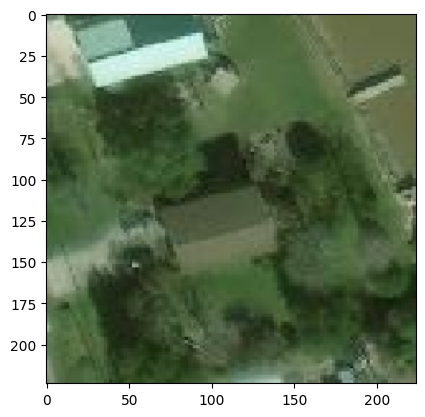

In [22]:
#load and view the test image
test_image_path="/content/drive/MyDrive/Flood_images/test/no_damage/-95.062371_29.829815999999997.jpeg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [23]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /= 255.
prediction = model.predict(img_array)
print(prediction)
ind=np.argmax(prediction[0])
print(class_name[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[5.0021504e-04 5.1534207e-06 9.9949467e-01]]
no_damage
